### Questions
* Seaborn, graphs and placeholder values

### Objectives
YWBAT 
* know and apply strategies for handling null values
* "" for handling placeholders
* "" normalizing and standardizing data

### Outline
* Questions
* Load in our data and clean it

### Outline

In [200]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

### Loading in super hero powers

In [2]:
df = pd.read_csv("super_hero_powers.csv")
df.head()

,hero_names,Agility,Accelerated Healing,Lantern Power Ring,Dimensional Awareness,Cold Resistance,Durability,Stealth,Energy Absorption,Flight,...,Web Creation,Reality Warping,Odin Force,Symbiote Costume,Speed Force,Phoenix Force,Molecular Dissipation,Vision - Cryo,Omnipresent,Omniscient
0,3-D Man,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,A-Bomb,False,True,False,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,Abe Sapien,True,True,False,False,True,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,Abin Sur,False,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,Abomination,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [5]:
df["Agility"].dtype == bool

True

In [6]:
for column in df.columns:
    if df[column].dtype == bool:
        continue
    else:
        print(column)

hero_names


In [9]:
df['Agility'].isna().sum() == 0

True

In [10]:
for column in df.columns:
    if df[column].isna().sum() > 0:
        print(column)

### Load in heros_information.csv

In [104]:
df2 = pd.read_csv("heroes_information.csv", index_col=0)
df2.head()

,name,Gender,Eye color,Race,Hair color,Height,Publisher,Skin color,Alignment,Weight
0,A-Bomb,Male,yellow,Human,No Hair,203.0,Marvel Comics,-,good,441.0
1,Abe Sapien,Male,blue,Icthyo Sapien,No Hair,191.0,Dark Horse Comics,blue,good,65.0
2,Abin Sur,Male,blue,Ungaran,No Hair,185.0,DC Comics,red,good,90.0
3,Abomination,Male,green,Human / Radiation,No Hair,203.0,Marvel Comics,-,bad,441.0
4,Abraxas,Male,blue,Cosmic Entity,Black,-99.0,Marvel Comics,-,bad,-99.0


In [105]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 734 entries, 0 to 733
Data columns (total 10 columns):
name          734 non-null object
Gender        734 non-null object
Eye color     734 non-null object
Race          734 non-null object
Hair color    734 non-null object
Height        734 non-null float64
Publisher     719 non-null object
Skin color    734 non-null object
Alignment     734 non-null object
Weight        732 non-null float64
dtypes: float64(2), object(8)
memory usage: 63.1+ KB


In [106]:
df2.isna().sum()

name           0
Gender         0
Eye color      0
Race           0
Hair color     0
Height         0
Publisher     15
Skin color     0
Alignment      0
Weight         2
dtype: int64

In [107]:
df2[df2.Publisher.isna()==True].head()

,name,Gender,Eye color,Race,Hair color,Height,Publisher,Skin color,Alignment,Weight
46,Astro Boy,Male,brown,-,Black,-99.0,NaN,-,good,-99.0
86,Bionic Woman,Female,blue,Cyborg,Black,-99.0,NaN,-,good,-99.0
138,Brundlefly,Male,-,Mutant,-,193.0,NaN,-,-,-99.0
175,Chuck Norris,Male,-,-,-,178.0,NaN,-,good,-99.0
204,Darkside,-,-,-,-,-99.0,NaN,-,bad,-99.0


In [108]:
df2[df2.Height==-99].head()

,name,Gender,Eye color,Race,Hair color,Height,Publisher,Skin color,Alignment,Weight
4,Abraxas,Male,blue,Cosmic Entity,Black,-99.0,Marvel Comics,-,bad,-99.0
6,Adam Monroe,Male,blue,-,Blond,-99.0,NBC - Heroes,-,good,-99.0
14,Alex Mercer,Male,-,Human,-,-99.0,Wildstorm,-,bad,-99.0
15,Alex Woolsly,Male,-,-,-,-99.0,NBC - Heroes,-,good,-99.0
18,Allan Quatermain,Male,-,-,-,-99.0,Wildstorm,-,good,-99.0


In [109]:
df2.Height.replace(to_replace=-99.0, value=np.nan, inplace=True)

In [110]:
df2.Weight.replace(to_replace=-99.0, value=np.nan, inplace=True)

In [111]:
df2["Skin color"].replace(to_replace="-", value=np.nan, inplace=True)

In [112]:
df2["Gender"].replace(to_replace="-", value=np.nan, inplace=True)

In [113]:
df2["Eye color"].replace(to_replace="-", value=np.nan, inplace=True)

In [114]:
df2["Race"].replace(to_replace="-", value=np.nan, inplace=True)

In [115]:
df2["Hair color"].replace(to_replace="-", value=np.nan, inplace=True)

In [116]:
df2["Alignment"].replace(to_replace="-", value=np.nan, inplace=True)

### or apply replace to entire dataframe

In [86]:
df2.replace(to_replace=["-", -99.0], value=np.nan, inplace=True)

In [87]:
df2.isnull().sum()

name            0
Gender         29
Eye color     172
Race          304
Hair color    172
Height        217
Publisher      15
Skin color    662
Alignment       7
Weight        239
dtype: int64

In [102]:
df2.head()

,name,Gender,Eye color,Race,Hair color,Height,Publisher,Skin color,Alignment,Weight
0,A-Bomb,Male,yellow,Human,No Hair,203.0,Marvel Comics,NaN,good,441.0
1,Abe Sapien,Male,blue,Icthyo Sapien,No Hair,191.0,Dark Horse Comics,blue,good,65.0
2,Abin Sur,Male,blue,Ungaran,No Hair,185.0,DC Comics,red,good,90.0
3,Abomination,Male,green,Human / Radiation,No Hair,203.0,Marvel Comics,NaN,bad,441.0
4,Abraxas,Male,blue,Cosmic Entity,Black,NaN,Marvel Comics,NaN,bad,NaN


In [121]:
new_columns = []
for col in df2.columns:
    if len(col.split(" ")) > 1:
        new_columns.append(col.replace(" ", "").lower())
    else:
        new_columns.append(col.lower())

In [122]:
columns_dict = dict(zip(df2.columns, new_columns))

In [124]:
df2.rename(mapper=columns_dict, inplace=True, axis=1)
df2.head()

,name,gender,eyecolor,race,haircolor,height,publisher,skincolor,alignment,weight
0,A-Bomb,Male,yellow,Human,No Hair,203.0,Marvel Comics,NaN,good,441.0
1,Abe Sapien,Male,blue,Icthyo Sapien,No Hair,191.0,Dark Horse Comics,blue,good,65.0
2,Abin Sur,Male,blue,Ungaran,No Hair,185.0,DC Comics,red,good,90.0
3,Abomination,Male,green,Human / Radiation,No Hair,203.0,Marvel Comics,NaN,bad,441.0
4,Abraxas,Male,blue,Cosmic Entity,Black,NaN,Marvel Comics,NaN,bad,NaN


In [125]:
df2.isna().sum()

name           0
gender        29
eyecolor     172
race         304
haircolor    172
height       217
publisher     15
skincolor    662
alignment      7
weight       239
dtype: int64

In [126]:
df2.alignment.value_counts()

good       496
bad        207
neutral     24
Name: alignment, dtype: int64

In [136]:
df2[df2.alignment.isna()]

,name,gender,eyecolor,race,haircolor,height,publisher,skincolor,alignment,weight
110,Blackwulf,Male,red,Alien,White,188.0,Marvel Comics,NaN,NaN,88.0
138,Brundlefly,Male,NaN,Mutant,NaN,193.0,NaN,NaN,NaN,NaN
426,Man of Miracles,Male,blue,God / Eternal,Silver,NaN,Image Comics,NaN,NaN,NaN
535,Q,Male,NaN,God / Eternal,NaN,NaN,Star Trek,NaN,NaN,NaN
676,Trickster,Male,blue,Human,Blond,183.0,DC Comics,NaN,NaN,81.0


In [137]:
df2.isna().sum()

name           0
gender        28
eyecolor     172
race         304
haircolor    172
height       217
publisher     15
skincolor    662
alignment      5
weight       239
dtype: int64

In [150]:
df2[df2.publisher.isna()]

,name,gender,eyecolor,race,haircolor,height,publisher,skincolor,alignment,weight
46,Astro Boy,Male,brown,NaN,Black,NaN,NaN,NaN,good,NaN
86,Bionic Woman,Female,blue,Cyborg,Black,NaN,NaN,NaN,good,NaN
138,Brundlefly,Male,NaN,Mutant,NaN,193.0,NaN,NaN,NaN,NaN
175,Chuck Norris,Male,green,Human,Brown,178.0,NaN,NaN,good,NaN
204,Darkside,NaN,NaN,NaN,NaN,NaN,NaN,NaN,bad,NaN
244,Ethan Hunt,Male,brown,Human,Brown,168.0,NaN,NaN,good,NaN
263,Flash Gordon,Male,NaN,NaN,NaN,NaN,NaN,NaN,good,NaN
286,Godzilla,NaN,NaN,Kaiju,NaN,108.0,NaN,grey,bad,NaN
348,Jack Bauer,Male,NaN,NaN,NaN,NaN,NaN,NaN,good,NaN
354,Jason Bourne,Male,NaN,Human,NaN,NaN,NaN,NaN,good,NaN


In [149]:
df2.loc[df2.name =='Chuck Norris', ['haircolor']] = 'Brown'

In [151]:
df2.drop(columns='skincolor', inplace=True, axis=1)
df2.head()

,name,gender,eyecolor,race,haircolor,height,publisher,alignment,weight
0,A-Bomb,Male,yellow,Human,No Hair,203.0,Marvel Comics,good,441.0
1,Abe Sapien,Male,blue,Icthyo Sapien,No Hair,191.0,Dark Horse Comics,good,65.0
2,Abin Sur,Male,blue,Ungaran,No Hair,185.0,DC Comics,good,90.0
3,Abomination,Male,green,Human / Radiation,No Hair,203.0,Marvel Comics,bad,441.0
4,Abraxas,Male,blue,Cosmic Entity,Black,NaN,Marvel Comics,bad,NaN


In [156]:
df2["name"].dtype == 'O'

True

### convert all lettering to lowercase

In [157]:
for col in df2.columns:
    if df2[col].dtype == 'O':
        df2[col] = df2[col].str.lower()
df2.head()

,name,gender,eyecolor,race,haircolor,height,publisher,alignment,weight
0,a-bomb,male,yellow,human,no hair,203.0,marvel comics,good,441.0
1,abe sapien,male,blue,icthyo sapien,no hair,191.0,dark horse comics,good,65.0
2,abin sur,male,blue,ungaran,no hair,185.0,dc comics,good,90.0
3,abomination,male,green,human / radiation,no hair,203.0,marvel comics,bad,441.0
4,abraxas,male,blue,cosmic entity,black,NaN,marvel comics,bad,NaN


### Let's make a column with superpowers!!!!
* column name = superpowers
* dtype = list
* list populated by strings

In [159]:
df.shape, df2.shape

((667, 168), (734, 9))

In [182]:
heros = {}
# {hero_name: [list of powers]}
for index, row in df.iterrows():
    powers = []
    for col in row.index[1:]:
        if row[col] == True:
            powers.append(col.lower())
    heros[row.values[0].lower()] = powers
heros

{'3-d man': ['agility', 'super strength', 'stamina', 'super speed'],
 'a-bomb': ['accelerated healing',
  'durability',
  'longevity',
  'super strength',
  'stamina',
  'camouflage',
  'self-sustenance'],
 'abe sapien': ['agility',
  'accelerated healing',
  'cold resistance',
  'durability',
  'underwater breathing',
  'marksmanship',
  'weapons master',
  'longevity',
  'intelligence',
  'super strength',
  'telepathy',
  'stamina',
  'immortality',
  'reflexes',
  'enhanced sight',
  'sub-mariner'],
 'abin sur': ['lantern power ring'],
 'abomination': ['accelerated healing',
  'intelligence',
  'super strength',
  'stamina',
  'super speed',
  'invulnerability',
  'animation',
  'super breath'],
 'abraxas': ['dimensional awareness',
  'flight',
  'intelligence',
  'super strength',
  'size changing',
  'super speed',
  'teleportation',
  'magic',
  'dimensional travel',
  'immortality',
  'invulnerability',
  'molecular manipulation',
  'energy manipulation',
  'power cosmic'],
 'a

In [194]:
powers_column = []

In [195]:
for name in df2.name:
    powers = heros.get(name, None)
    powers_column.append(powers)
powers_column

[['accelerated healing',
  'durability',
  'longevity',
  'super strength',
  'stamina',
  'camouflage',
  'self-sustenance'],
 ['agility',
  'accelerated healing',
  'cold resistance',
  'durability',
  'underwater breathing',
  'marksmanship',
  'weapons master',
  'longevity',
  'intelligence',
  'super strength',
  'telepathy',
  'stamina',
  'immortality',
  'reflexes',
  'enhanced sight',
  'sub-mariner'],
 ['lantern power ring'],
 ['accelerated healing',
  'intelligence',
  'super strength',
  'stamina',
  'super speed',
  'invulnerability',
  'animation',
  'super breath'],
 ['dimensional awareness',
  'flight',
  'intelligence',
  'super strength',
  'size changing',
  'super speed',
  'teleportation',
  'magic',
  'dimensional travel',
  'immortality',
  'invulnerability',
  'molecular manipulation',
  'energy manipulation',
  'power cosmic'],
 ['cold resistance',
  'durability',
  'energy absorption',
  'super strength',
  'invulnerability',
  'elemental transmogrification',

In [185]:
df.shape, df2.shape

((667, 168), (734, 9))

In [188]:
d = {"a": 5}

In [189]:
d.get("a", "b")

5

In [191]:
d.get("b", "this is cool")

'this is cool'

In [196]:
df2["superpowers"] = powers_column
df2.head()

,name,gender,eyecolor,race,haircolor,height,publisher,alignment,weight,superpowers
0,a-bomb,male,yellow,human,no hair,203.0,marvel comics,good,441.0,"[accelerated healing, durability, longevity, s..."
1,abe sapien,male,blue,icthyo sapien,no hair,191.0,dark horse comics,good,65.0,"[agility, accelerated healing, cold resistance..."
2,abin sur,male,blue,ungaran,no hair,185.0,dc comics,good,90.0,[lantern power ring]
3,abomination,male,green,human / radiation,no hair,203.0,marvel comics,bad,441.0,"[accelerated healing, intelligence, super stre..."
4,abraxas,male,blue,cosmic entity,black,NaN,marvel comics,bad,NaN,"[dimensional awareness, flight, intelligence, ..."


### Histogram

In [197]:
males = df2[df2.gender == 'male']
females = df2[df2.gender == 'female']

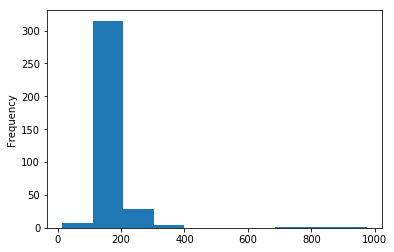

In [199]:
sns.

In [211]:
def plot_sns_hist(df, col):
    plt.figure(figsize=(8, 5))
    plt.grid()
    sns.distplot(df[col].dropna(), bins=20)
    plt.show()

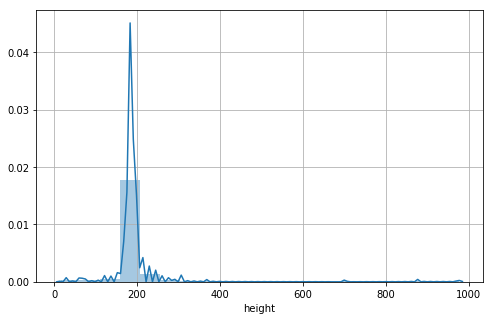

In [212]:
plot_sns_hist(males, 'height')

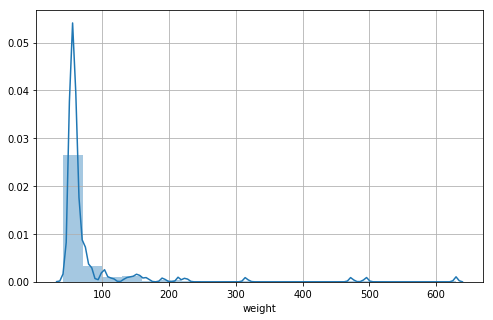

In [213]:
plot_sns_hist(females, 'weight')

### Assessment

### What did I learn?
* Start differently find placeholders get a feel for the data - Savannah
* How to methodically go through the table - Levi
* Using for loops to iterate through rows and columns in dataframes - Levi
* Chuck Norris has green eyes - Parker
* get method for dictionaries is a quick if/else statement
* .str methods on dataframes - Parker
* understanding of syntax around dfs - Parker
* choose columns based on datatype